<a href="https://colab.research.google.com/github/kameda-yoshinari/DataAlgo2020/blob/master/DataAlgo2020_004(BFS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2. 幅優先探索

ここでは幅優先探索(Breadth first search; BFS)について学ぶ．  
幅優先探索によって，グラフに即した形で全頂点の列挙を行う．


**いつもの約束**  
１つのコードセルだけの実行は Ctrl + Enter．  
エディタで「インデント幅（スペース）は4で表示」「行番号を表示」「インデントガイドを表示」．  
内部では日本語はUTF-8で表現されている．


# 準備

インスタンスに接続し起動する．  
下記の手順でGoogle Driveをマウントする．  
マウント先に移動し，作業フォルダとする．  
これによって，インスタンスがリセットされてもGoogle Drive内にファイルが保存されるようにする．

In [0]:
!echo "Google Driveをマウントします"
from google.colab import drive 
drive.mount('/content/drive')

In [0]:
!echo "今回の作業用フォルダを作成しそこに移動します"
%cd /content/drive/My\ Drive/202004_DataAlgo
%mkdir -p DA2020_004
%cd DA2020_004
!ls
!echo "日本時間表示"
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Japan /etc/localtime
!date

ここでは，グラフ3を利用する．  
頂点数は8．無向グラフ．連結．


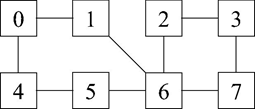

In [0]:
%%writefile graph3.h
// 8 nodes, undirected, no-weight.
#define N 8
int edge[N][N] = {
//   0 1 2 3 4 5 6 7
	{0,1,0,0,1,0,0,0}, // 0
	{1,0,0,0,0,0,1,0}, // 1
	{0,0,0,1,0,0,1,0}, // 2
	{0,0,1,0,0,0,0,1}, // 3
	{1,0,0,0,0,1,0,0}, // 4
 	{0,0,0,0,1,0,1,0}, // 5
	{0,1,1,0,0,1,0,1}, // 6
	{0,0,0,1,0,0,1,0}  // 7
};

# 幅優先探索の概要

Rogueのようなダンジョン型RPGにおいて，最初の部屋（開始頂点）から近い部屋から制圧していくの幅優先探索である．慎重な戦略とも言える．

より正確には，開始頂点からの道が近い頂点から先に列挙していく探索が幅優先探索である．ここで，全ての辺は同じ長さを持つとする．（道において同一頂点は高々１回しか現れないことに注意．）

幅優先探索のアルゴリズムの記述においては，キュー(First-In-First-Out)を利用する．大雑把に言えば，開始頂点から近い頂点から調査を行って列挙していく．このとき，その頂点に隣接している未列挙頂点は後回しにする（キューに繋ぐ）．ある頂点について調査が終わった時，次に調査に取り掛かるのはキューに繋いだ中で一番古いものである（First-In-First-Out）．これは，後から繋いだものほど開始頂点から遠い頂点ということになるからである．

参考までに，グラフG3について頂点0からBFSを実施した場合，幅優先による頂点列挙の結果は次のようになる．  
ただし，同じ優先度の頂点が複数あったときは，番号の小さい方の頂点を選択するものとする．

BFS result: 0 1 4 6 5 2 7 3

# 幅優先探索プログラム

**目標**

キューを用いた幅優先探索によって，与えられたグラフの頂点を列挙する．

**説明**

開始頂点は指定されるものとする．  
  
キューは，スーパーのレジで人が並ぶのと同じものだと思えばよい．  
キュー（行列）の先頭を head と呼ぶことにする．  
キュー（行列）の末尾を tail と呼ぶことにする．  
新しくオブジェクトを追加するときは，それをキューの末尾に繋ぐ．  
キューに追加する操作を enqueueと呼ぶ．  
（人が行列の最後尾に並ぶのと同じことである．）  
キューから削除する操作を dequeueと呼ぶ．  
（人が行列の先頭から進んでレジのところに移動するのと同じことである．）  

**コード**

下記の通り．  
グラフが無向で連結である限り，幅優先探索は必ず成功する．  
そのため，bfs()はvoidとしている．

**備考**

なし．

In [0]:
%%writefile bfs_simple_J.c
// Breadth First Search.
// 2020/05 kameda[at]ccs.tsukuba.ac.jp
#include <stdio.h> // printf()
#include "graph3.h"

// 幅優先探索本体
void bfs(int StartingRoom){
	int listed[N]; // 0 未, 1 済
	int queue[N];
	int qhead = 0; // queue head
	int qtail = 0; // queue tail
    
    int CurrentRoom;
    int RoomToCheck;

	for (RoomToCheck = 0; RoomToCheck < N; RoomToCheck++)
		listed[RoomToCheck] = 0;
	
	printf("幅優先探索を 頂点%d から開始します．\n", StartingRoom);
    // StartingRoomをキューに追加する
    queue[qtail] = StartingRoom;
    qtail++;

    // キューに追加したということは訪れる対象として計上（列挙）済みということ
	printf("頂点 %d をこれ以降は列挙済として扱います．\n", StartingRoom);
    listed[StartingRoom] = 1;
 
    // キューに処理対象がある限り作業を継続
	while (qhead < qtail) {
		printf("現在のキュー： 長さ %d, 先頭の頂点は %d, 末尾の頂点は %d\n", qtail - qhead, queue[qhead], queue[qtail - 1]);
    	{int i; printf("現在のキュー： "); for (i = qhead; i < qtail; i++) printf("%d ", queue[i]); printf("\n");}

        // キュー先頭から１つ呼んで作業開始（キューからは削除）
        printf("キュー先頭の頂点 %d をキューから外して処理を開始します．\n", queue[qhead]);
		CurrentRoom = queue[qhead];
        qhead++;

        // ※ここで何かしらの作業を行うのかも．

        // 次にどの頂点を列挙していくか検討
		for (RoomToCheck = 0; RoomToCheck < N; RoomToCheck++) {
            if (edge[CurrentRoom][RoomToCheck] == 0) {
				printf("  (頂点 %d にて) 頂点 %d は隣接していませんでした‥\n", CurrentRoom, RoomToCheck);
            } else if (listed[RoomToCheck] != 0) {
				printf("  (頂点 %d にて) 頂点 %d は隣接はしてますがすでに処理済でした‥\n", CurrentRoom, RoomToCheck);
            } else {         
				printf("  (頂点 %d にて) 頂点 %d は隣接でかつキューに繋いだことがないので、キューの最後尾に追加します。\n", CurrentRoom, RoomToCheck);
                // RoomToCheckをキューに追加する
				queue[qtail] = RoomToCheck;
                qtail++;

                // キューに追加したということは訪れる処理対象として計上（列挙）済みということ
                printf("  (頂点 %d にて) 頂点 %d をこれ以降は列挙済として扱います．\n", CurrentRoom, RoomToCheck);
				listed[RoomToCheck] = 1;
			}
		}
	}
	printf("何も残っていないので幅優先探索を終了します．\n");

	printf("幅優先探索による頂点の列挙．\n");
	for (CurrentRoom = 0; CurrentRoom < N; CurrentRoom++)
		printf("%d ", queue[CurrentRoom]);
    printf("\n");

	return;
}

int main(int argc, char *argv[]){
	bfs(0); // 開始頂点番号を引数にしてbfs関数を呼び出す
	return 0;
}

コンパイルしてエラーが無いことを確認．

In [0]:
!gcc -Wall -o bfs_simple_J bfs_simple_J.c

実行．

In [0]:
!./bfs_simple_J

# 拡張（引数の利用）

**目標**

引数にて開始頂点を指定できるようにする．  

**説明**

引数を数値にするためにはatoi()関数を用いる．  
（atoi()関数ではエラーハンドリングができないため，エラーハンドリングができるstrtol()関数のほうが頑健なプログラム作成には望ましい．  ）

**コード**

次はatoi()関数を引数の解釈に用いる例である．   
main()関数内で引数の確認を行っている．  

**備考**

bfs()関数部分には変更を加えていない．  



In [0]:
%%writefile bfs_xtraCommandLine_J.c
// Breadth First Search.
// 2020/05 kameda[at]ccs.tsukuba.ac.jp
// -- Extra --
//    Accept command line option
#include <stdio.h> // printf()
#include <stdlib.h> // atoi()
#include "graph3.h"

// 幅優先探索本体
void bfs(int StartingRoom){
	int listed[N]; // 0 未, 1 済
	int queue[N];
	int qhead = 0; // queue head
	int qtail = 0; // queue tail
    
    int CurrentRoom;
    int RoomToCheck;

	for (RoomToCheck = 0; RoomToCheck < N; RoomToCheck++)
		listed[RoomToCheck] = 0;
	
	printf("幅優先探索を 頂点%d から開始します．\n", StartingRoom);
    // StartingRoomをキューに追加する
    queue[qtail] = StartingRoom;
    qtail++;

    // キューに追加したということは訪れる対象として計上（列挙）済みということ
	printf("頂点 %d をこれ以降は列挙済として扱います．\n", StartingRoom);
    listed[StartingRoom] = 1;
 
    // キューに処理対象がある限り作業を継続
	while (qhead < qtail) {
		printf("現在のキュー： 長さ %d, 先頭の頂点は %d, 末尾の頂点は %d\n", qtail - qhead, queue[qhead], queue[qtail - 1]);
    	{int i; printf("現在のキュー： "); for (i = qhead; i < qtail; i++) printf("%d ", queue[i]); printf("\n");}

        // キュー先頭から１つ呼んで作業開始（キューからは削除）
        printf("キュー先頭の頂点 %d をキューから外して処理を開始します．\n", queue[qhead]);
		CurrentRoom = queue[qhead];
        qhead++;

        // ※ここで何かしらの作業を行うのかも．

        // 次にどの頂点を列挙していくか検討
		for (RoomToCheck = 0; RoomToCheck < N; RoomToCheck++) {
            if (edge[CurrentRoom][RoomToCheck] == 0) {
				printf("  (頂点 %d にて) 頂点 %d は隣接していませんでした‥\n", CurrentRoom, RoomToCheck);
            } else if (listed[RoomToCheck] != 0) {
				printf("  (頂点 %d にて) 頂点 %d は隣接はしてますがすでに処理済でした‥\n", CurrentRoom, RoomToCheck);
            } else {         
				printf("  (頂点 %d にて) 頂点 %d は隣接でかつキューに繋いだことがないので、キューの最後尾に追加します。\n", CurrentRoom, RoomToCheck);
                // RoomToCheckをキューに追加する
				queue[qtail] = RoomToCheck;
                qtail++;

                // キューに追加したということは訪れる処理対象として計上（列挙）済みということ
                printf("  (頂点 %d にて) 頂点 %d をこれ以降は列挙済として扱います．\n", CurrentRoom, RoomToCheck);
				listed[RoomToCheck] = 1;
			}
		}
	}
	printf("何も残っていないので幅優先探索を終了します．\n");

	printf("幅優先探索による頂点の列挙．\n");
	for (CurrentRoom = 0; CurrentRoom < N; CurrentRoom++)
		printf("%d ", queue[CurrentRoom]);
    printf("\n");

	return;
}

int main(int argc, char *argv[]){
    int startnode = 0;
    if (argc == 1) {
        printf("指定がなかったので頂点0を開始頂点にします．");
        startnode = 0;
    } else if (argc == 2) {
        startnode = atoi(argv[1]);
        if (startnode < 0 || startnode >= N) {
            printf("不正な頂点指定だったので終了します．");
            return -1;
        }
    }

	bfs(startnode); // 開始頂点番号を引数にしてbfs関数を呼び出す
	return 0;
}

コンパイルしてエラーが無いことを確認．

In [0]:
!gcc -Wall -o bfs_xtraCommandLine_J bfs_xtraCommandLine_J.c

実行．

In [0]:
!./bfs_xtraCommandLine_J 2

# 拡張（関数の利用）

**目標**

キューへ繋ぐことと，キューから外すことを，それぞれユーザ定義関数化する．

**説明**

ユーザ定義関数は別ソースファイルに記述する．  
これによって，将来ライブラリにすることができる．

**コード**

３つのファイルに分割する．
* キュー操作のヘッダファイル
* キュー操作を集めたソースファイル
* 幅優先探索を行うプログラム

**備考**

分割コンパイルで実行ファイルを生成する．

In [0]:
%%writefile QueueLib_J.h
// Queue management
// 2020/05 kameda[at]ccs.tsukuba.ac.jp

// キューの初期化
int *initqueue(int );

// キューへの追加
int enqueue(int );

// キューからの削除
int dequeue(void);

// キューの状態表示
int showqueue(void);

// キューの全表示
int showallqueue(void);


In [0]:
%%writefile QueueLib_J.c
// Queue management
// 2020/05 kameda[at]ccs.tsukuba.ac.jp
#include <stdio.h> // printf()
#include <stdlib.h> // calloc()
#include "QueueLib_J.h" // プロトタイプ宣言の整合確認

int *queue = NULL; // キューの本体（初期化してから使う）
int qsize = 0; // キューのサイズ
int qhead = 0; // キューの先頭
int qtail = 0; // キューの末尾

// キューの初期化
int *initqueue(int n) {
    queue = calloc(n, sizeof(*queue));
    if (queue == NULL) {
        printf("【失敗】 %d要素分のキュー領域を確保できませんでした．\n", n);
    }
    qsize = n;
    return queue;
}

// キューへの追加
int enqueue(int v) {
    if (queue == NULL) {
        printf("【失敗】 キューが用意できていません．\n");
        return -1;
    } else if (qtail >= qsize) {
        printf("【失敗】 %d要素確保してあったキュー領域を使い果たしてしまいました．\n", qsize);
        return -2;
    }
    queue[qtail] = v;
    qtail++;
    return 0;
}

// キューからの削除
int dequeue(void) {
    int v;
    if (queue == NULL) {
        printf("【失敗】 キューが用意できていません．\n");
        return -1;
    } else if (qhead >= qtail) {
        printf("【報告】 キューに処理対象がありません．\n");
        return -2;
    }
    v = queue[qhead];
    qhead++;
    return v;
}

// キューの状態表示
int showqueue(void) {
    int i;

    if (queue == NULL) {
        printf("【失敗】 キューが用意できていません．\n");
        return -1;
    }

    printf("qsize = %d, qhead = %d, qtail = %d\n", qsize, qhead, qtail);
    for (i = qhead; i < qtail; i++) {
        printf("%d ", queue[i]);
    }
    printf("\n");

    return qtail - qhead;
}

// キューの全表示
int showallqueue(void) {
    int i;

    if (queue == NULL) {
        printf("【失敗】 キューが用意できていません．\n");
        return -1;
    }

    printf("qsize = %d, qhead = %d, qtail = %d\n", qsize, qhead, qtail);
    for (i = 0; i < qsize; i++) {
        printf("%d ", queue[i]);
    }
    printf("\n");

    return qsize;
}



分割したキュー関係のソースファイルのみコンパイル．  
（ライブラリの作成に相当）

In [0]:
!gcc -Wall -c QueueLib_J.c

キュー関係の関数は外部のを用いるので，それに合わせて書き直す．   
"QueueLib_J.h"の内容のみ参照して書き直せればよい．   
（この辺りの内容はプログラミング序論Dで学習済み）  

外部関数等を使いながらmain()関数などを書く場合，ユーザプログラムと呼ぶことがある．  

In [0]:
%%writefile bfs_xtraFuncCalls_J.c
// Breadth First Search.
// 2020/05 kameda[at]ccs.tsukuba.ac.jp
// -- Extra --
//    Accept command line option
//    Call functions for enqueue and dequeue
#include <stdio.h> // printf()
#include <stdlib.h> // atoi()
#include "QueueLib_J.h"
#include "graph3.h"

// 幅優先探索本体
void bfs(int StartingRoom){
    int listed[N]; // 0 未, 1 済
    
    int CurrentRoom;
    int RoomToCheck;

	for (RoomToCheck = 0; RoomToCheck < N; RoomToCheck++)
		listed[RoomToCheck] = 0;

    // キューの初期化
    initqueue(N);
	
	printf("幅優先探索を 頂点%d から開始します．\n", StartingRoom);
    // StartingRoomをキューに追加する
    enqueue(StartingRoom);

    // キューに追加したということは訪れる対象として（列挙）計上済みということ
    printf("頂点 %d をこれ以降は列挙済として扱います．\n", StartingRoom);
    listed[StartingRoom] = 1;

    // キューの状態表示
    // while()文のところでキュー操作が行われるため，その直前状態を表示するため表示タイミングを移動
    showqueue();

    // キューに処理対象がある限り作業を継続
	while ((CurrentRoom = dequeue()) >= 0) {
        // キュー先頭から１つ呼んで作業開始（キューからは削除）
		printf("キュー先頭の頂点 %d をキューから外して処理を開始します．\n", CurrentRoom);
        
        // ※ここで何かしらの作業を行うのかも．

        // 次にどの頂点を列挙していくか検討
		for (RoomToCheck = 0; RoomToCheck < N; RoomToCheck++) {
            if (edge[CurrentRoom][RoomToCheck] == 0) {
				printf("  (頂点 %d にて) 頂点 %d は隣接していませんでした‥\n", CurrentRoom, RoomToCheck);
            } else if (listed[RoomToCheck] != 0) {
				printf("  (頂点 %d にて) 頂点 %d は隣接はしてますがすでに処理済でした‥\n", CurrentRoom, RoomToCheck);
            } else {     
				printf("  (頂点 %d にて) 頂点 %d は隣接でかつキューに繋いだことがないので、キューの最後尾に追加します。\n", CurrentRoom, RoomToCheck);
                // RoomToCheckをキューに追加する
				enqueue(RoomToCheck);
                
                // キューに追加したということは訪れる処理対象として計上（列挙）済みということ
                printf("  (頂点 %d にて) 頂点 %d をこれ以降は列挙済として扱います．\n", CurrentRoom, RoomToCheck);
				listed[RoomToCheck] = 1;
			}
		}
        // キューの状態表示
        // while()文のところでキュー操作が行われるため，その直前状態を表示するため表示タイミングを移動
        showqueue();
	}
	printf("何も残っていないので幅優先探索を終了します．\n");

	printf("幅優先探索による頂点の列挙．\n");
    showallqueue();

	return;
}

int main(int argc, char *argv[]){
    int startnode = 0;
    if (argc == 1) {
        printf("指定がなかったので頂点0を開始頂点にします．");
        startnode = 0;
    } else if (argc == 2) {
        startnode = atoi(argv[1]);
        if (startnode < 0 || startnode >= N) {
            printf("不正な頂点指定だったので終了します．");
            return -1;
        }
    }

	bfs(startnode); // 開始頂点番号を引数にしてbfs関数を呼び出す
	return 0;
}

ユーザプログラムのコンパイル（のみ）．

In [0]:
!gcc -Wall -c bfs_xtraFuncCalls_J.c

リンカを実行して，実行ファイルを作成．

In [0]:
!gcc -o bfs_xtraFuncCalls_J bfs_xtraFuncCalls_J.o QueueLib_J.o

実行．

In [0]:
!./bfs_xtraFuncCalls_J 0

# 節末課題

1. アルゴリズムの記述  
キューを用いた幅優先探索のアルゴリズムを日本語を用いて記述せよ．  
本講義資料に即した説明であること．   
キューの図も用いること．

2. アルゴリズムの完全性  
連結な無向グラフが与えられている限り，本節で示した幅優先探索アルゴリズムは必ず全頂点を列挙して終わることを示せ．これは本来は証明問題である．そういう文献等を探してきて読解しそれを説明するだけでも良い．

3. 計算量  
各プログラムの時間計算量と空間計算量を議論せよ．

4. queue[]使用量  
どのような無向で連結なグラフが指定されても，queue[]に必要な領域が頂点数を超えないことを示せ．

5. queue[]限界使用量  
どのような無向で連結なグラフが指定されると，queue[]の使用量が（一時的にとはいえ）最大となるか理由と共に示せ．ここでいう「最大」とは，qtail-qhead の値，すなわち待ち行列が最長になることを言う．また，逆に最小になるようなグラフとその理由を示せ．

6. 遠さの表示  
結果の列挙表示において，各頂点が開始頂点からどれだけ遠いかを数字で示すようなプログラムを示せ．遠さは開始頂点からの辺数で示すものとする．プログラムのベースには「拡張（引数の利用）」を用いよ．  
(例) BFS result: 0(0) 1(1) 4(1) 6(2) 5(2) 2(3) 7(3) 3(4)

7. atoi()関数について  
* atoi()関数に数値と解釈できない文字列を渡したら何が起きるか述べよ．
* atoi()関数に数値と解釈できない文字列を渡したら何が起きるか確認せよ．

8. strtol()関数について  
* strtol()関数でエラートラップする仕組みを述べよ．
* strtol()関数でエラートラップする簡単なプログラムを作成せよ．  
（ヒント：stortol()関数ではerrnoを用いてエラー処理を実施する．）

9. queue[]前詰め  
queue[]から処理単位を削除した後，queue[]の内容を前詰めするプログラムを示せ．（言い換えれば queue[0] が常にキューの先頭であるようにすること．）

10. グラフの指定  
 "graph3.h"をインクルードする代わりに，グラフの隣接行列を記述したテキストファイルを読み込み，それを利用することが考えられる．そうできるプログラムを示せ．


# 出典

筑波大学工学システム学類  
データ構造とアルゴリズム  
担当：亀田能成  
2020/05/19.



